In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.shape

(2200, 8)

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [13]:
X = df.drop('label',axis=1)
y = df['label']

In [15]:
scaler.fit_transform(X)

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
from sklearn.tree import plot_tree

In [33]:
accuracy = accuracy_score(y_test,y_pred)

In [35]:
print(f'The accuracy of the model is : {accuracy*100:.2f}%')

The accuracy of the model is : 98.79%


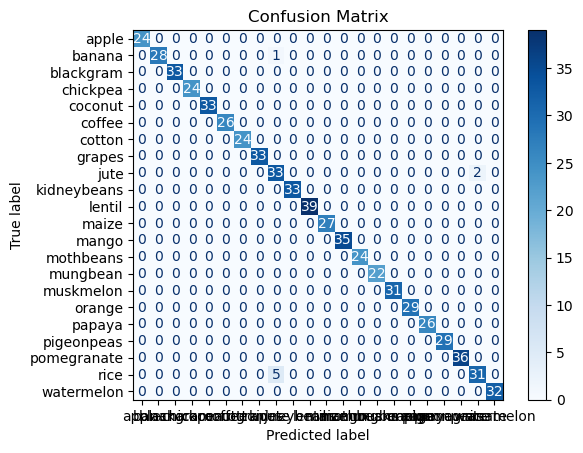

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      0.97      0.98        29
   blackgram       1.00      1.00      1.00        33
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.94      0.89        35
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        39
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        35
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        29
   

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n")
print(classification_report(y_test, y_pred))